In [1]:
import numpy as np
# from zhenglin.dl.metrics import FID
from torchmetrics.image.fid import FrechetInceptionDistance

fake = np.load(r'feats_gen.npy')    # these two files were generated by /home/zhenglin/3DMotion/ACTOR/src/evaluate/action2motion/evaluate.py #Line 72
real = np.load(r'feats_gt.npy')

In [2]:
fake.shape

(1190, 30)

In [3]:
fake.shape == real.shape

True

In [4]:
fake

array([[-9.9965215e-01, -4.2676926e-05, -9.9965274e-01, ...,
        -9.8650151e-01,  9.9999923e-01, -9.9751389e-01],
       [ 9.9840921e-01, -9.9506259e-01,  8.0635244e-01, ...,
         6.0394669e-01, -9.9977678e-01, -9.9951804e-01],
       [ 9.9642378e-01, -9.9998534e-01,  9.9998432e-01, ...,
        -9.9981755e-01,  9.2439574e-01,  9.9999934e-01],
       ...,
       [-9.9972564e-01,  9.8262292e-01,  9.9637467e-01, ...,
         9.9977529e-01, -9.9486971e-01,  9.0968889e-01],
       [ 9.0567821e-01,  9.9955249e-01, -9.9857378e-01, ...,
         9.7354639e-01, -9.9989438e-01, -9.9117607e-01],
       [ 9.9843687e-01, -9.9988353e-01,  9.9845010e-01, ...,
        -9.9428093e-01,  9.9999511e-01,  9.9834257e-01]], dtype=float32)

In [5]:
fake.shape

(1190, 30)

In [6]:
if np.isnan(real).any():
    # find nan from real
    for i in range(real.shape[0]):
        for j in range(real.shape[1]):
            if np.isnan(real[i][j]):
                print(i, j)
                break

In [8]:
# real_safe = np.delete(real, [3610, 3637], axis=0)
# np.isnan(real_safe).any()

In [15]:
# fake_safe = np.delete(fake, [3610, 3617], axis=0)

In [7]:
fake_rand = np.random.rand(fake.shape[0], fake.shape[1])
real_rand = np.random.rand(fake.shape[0], fake.shape[1])

In [8]:
real_safe = real
fake_safe = fake

In [9]:
# shapiro-wilk test
# null hypothesis: the sample is drawn from a normal distribution
# once sample amount is more than 5000, shapiro-wilk test will be not reliable

import scipy

for i in range(30):
    x = real_safe[:, i]
    if scipy.stats.shapiro(x).pvalue < 0.05:
        print(i)

for i in range(30):
    x = fake_safe[:, i]
    if scipy.stats.shapiro(x).pvalue < 0.05:
        print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [10]:
# Kolmogorov-Smirnov test
# null hypothesis: the two distributions are identical(default, two-sided)
# tests are valid only for continuous distributions

from scipy.stats import kstest
normal_dist = np.random.randn(1000)
kstest(real_safe[:, 0],"norm")

KstestResult(statistic=0.2597922722058408, pvalue=2.4590593138280853e-71)

In [11]:
# D’Agostino and Pearson’s
# null hypothesis:  a sample comes from a normal distribution

from scipy.stats import normaltest

normaltest(real_safe[:, 0])

NormaltestResult(statistic=4590.134828259334, pvalue=0.0)

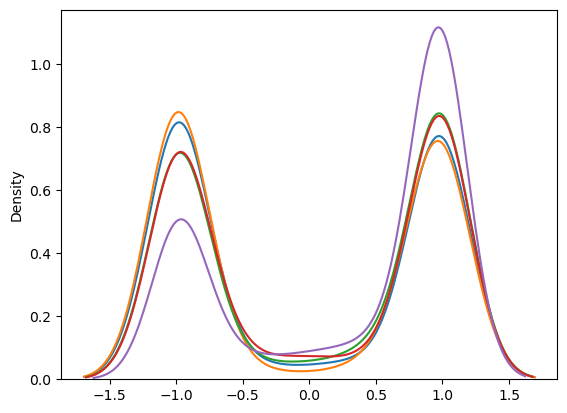

In [12]:
# illustration

import matplotlib.pyplot as plt
import seaborn as sns

# x = real_safe[:, 0]
# plt.hist(x, bins=100)

# plot kde
# sns.kdeplot(x, shade=True)

for i in range(5):
    x = real_safe[:, i]
    sns.kdeplot(x, shade=False)

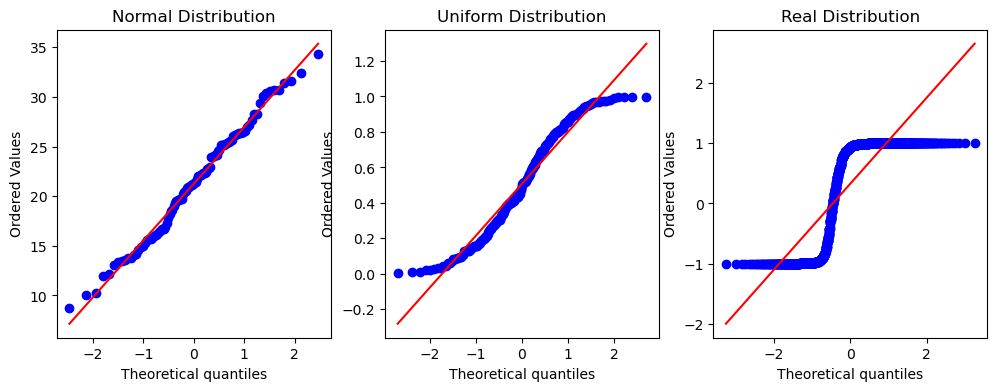

In [13]:
# probplot, PP plot 

import numpy as np 
import pylab 
import scipy.stats as stats

data_normal = np.random.normal(loc = 20, scale = 5, size=100)      # ideal normal distribution
data_real = real_safe[:, i]      # real distribution
data_uni = np.random.rand(200)      # uniform distribution

plt.figure(figsize=(12, 4))

ax1 = plt.subplot(1, 3, 1)
stats.probplot(data_normal, dist="norm", plot=pylab)
ax1.set_title("Normal Distribution")

ax2 = plt.subplot(1, 3, 2)
stats.probplot(data_uni, dist="norm", plot=pylab)
ax2.set_title("Uniform Distribution")

ax3 = plt.subplot(1, 3, 3)
stats.probplot(data_real, dist="norm", plot=pylab)
ax3.set_title("Real Distribution")

pylab.show()

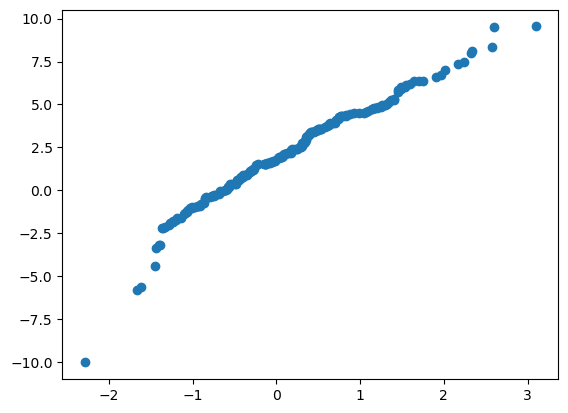

In [14]:
# testing
data_normal1 = np.random.normal(0, 1, 200)
data_normal1.sort()
data_normal2 = np.random.normal(2, 3, 200)
data_normal2.sort()
plt.scatter(data_normal1, data_normal2)

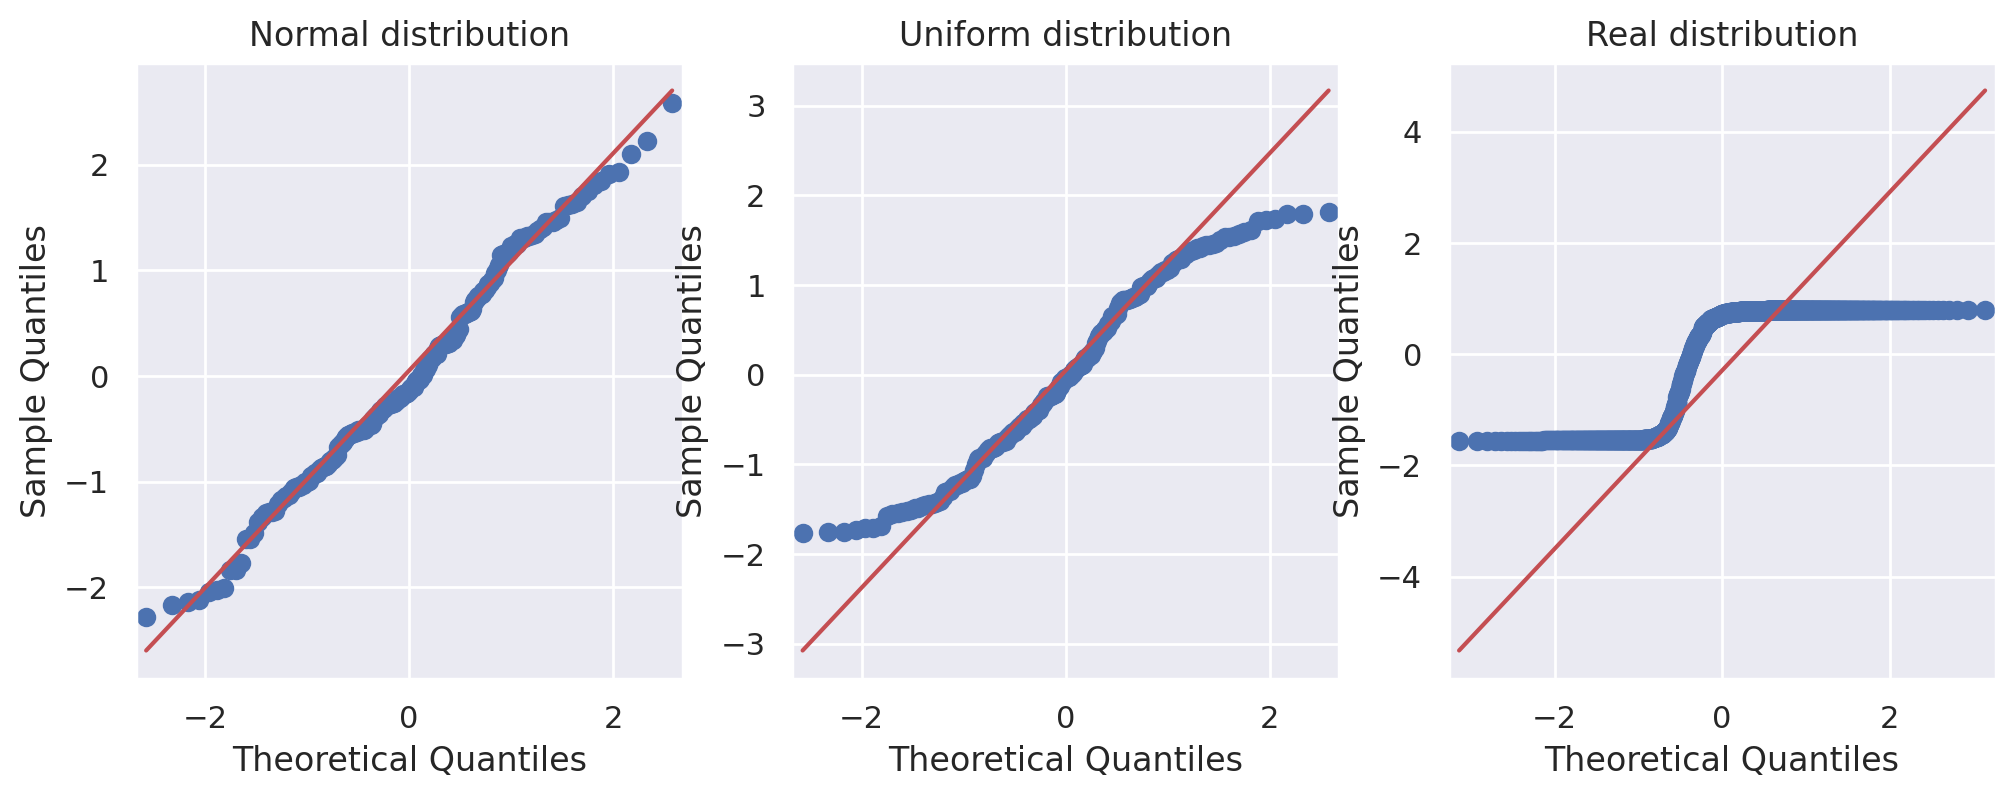

In [15]:
# qqplot

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.api import qqplot
 
sns.set_theme()# 设置风格
%config InlineBackend.figure_format = 'retina' # 让图片更清晰
 
mu, sigma = 0, 1      # 均值和标准差
data_normal = np.random.normal(mu, sigma, 200)
data_uni = np.random.rand(200)
data_real = real_safe[:, i]

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(131)
fig = qqplot(data_normal, line="q", ax=ax1, fit=True)
ax1.set_title("Normal distribution")

ax2 = fig.add_subplot(132)
fig = qqplot(data_uni, line="q", ax=ax2, fit=True)
ax2.set_title("Uniform distribution")

ax3 = fig.add_subplot(133)
fig = qqplot(data_real, line="q", ax=ax3, fit=True)
ax3.set_title("Real distribution")

plt.show()

In [16]:
real = fake_safe
fake = real_safe

n = fake.shape[0]

mean_fake = np.mean(real, axis=0)[None, ...]
mean_real = np.mean(fake, axis=0)[None, ...]

cov_fake_sum = fake.T @ fake - n * mean_fake.T @ mean_fake
cov_real_sum = real.T @ real - n * mean_real.T @ mean_real

cov_fake = cov_fake_sum / (n - 1)
cov_real = cov_real_sum / (n - 1)

In [17]:
mu1, mu2, sig1, sig2 = mean_fake, mean_real, cov_fake, cov_real

print(np.isnan(mu1).any(), np.isnan(mu2).any(), np.isnan(sig1).any(), np.isnan(sig2).any())

sig1sig2 = sig1 @ sig2
sig1sig2

False False False False


array([[ 2.46823215e+00, -1.89114594e+00,  1.59903800e+00,
        -6.25547767e-01, -6.97209895e-01, -5.91037273e-01,
         1.62745833e+00,  1.20181406e+00,  3.55503142e-01,
        -5.66625834e-01, -1.42085826e+00,  7.61872590e-01,
         3.30783099e-01,  2.07510203e-01,  1.67479849e+00,
         1.53215721e-01, -1.02158916e+00,  1.91483819e+00,
        -9.49506640e-01,  2.08640799e-01,  7.55756080e-01,
        -5.08253694e-01,  1.60127425e+00, -9.62004215e-02,
         1.32146907e+00,  1.32383990e+00,  1.79319775e+00,
        -3.34372282e-01,  4.07183409e-01,  3.22492540e-01],
       [-1.93091762e+00,  3.40910530e+00, -1.99788857e+00,
         1.06108105e+00,  1.32113600e+00,  9.38675523e-01,
        -1.09380770e+00, -8.33705902e-01, -6.55586064e-01,
         7.88367867e-01,  1.28664839e+00,  8.19075704e-01,
        -1.14859426e+00,  1.10026264e+00, -1.95659518e+00,
         8.38256478e-01, -5.69354713e-01, -1.65589070e+00,
         5.40636294e-03,  1.62242758e+00, -2.54872179e+

In [18]:
a = np.sum((mu1 - mu2) ** 2)
b = np.trace(sig1 + sig2 - 2 * np.sqrt(sig1sig2))

/tmp/ipykernel_19191/1235932114.py:2: RuntimeWarning: invalid value encountered in sqrt
  b = np.trace(sig1 + sig2 - 2 * np.sqrt(sig1sig2))


In [19]:
import torch

mu1_tensor = torch.tensor(mu1)
mu2_tensor = torch.tensor(mu2)
sig1_tensor = torch.tensor(sig1)
sig2_tensor = torch.tensor(sig2) 

a = (mu1_tensor - mu2_tensor).square().sum(dim=-1)
b = sig1_tensor.trace() + sig2_tensor.trace()
c = torch.linalg.eigvals(sig1_tensor @ sig2_tensor).sqrt().real.sum(dim=-1)

a + b - 2 * c

tensor([0.1719])

In [20]:
from scipy import linalg

print("Checking if mu1 is 1d")
mu1 = np.atleast_1d(mu1)
mu2 = np.atleast_1d(mu2)

print("Checking if sig1 is 2d")
sig1 = np.atleast_2d(sig1)
sig2 = np.atleast_2d(sig2)

assert mu1.shape == mu2.shape, \
    'Training and test mean vectors have different lengths'
assert sig1.shape == sig2.shape, \
    'Training and test covariances have different dimensions'

print("Calculating diff")
diff = mu1 - mu2

Checking if mu1 is 1d
Checking if sig1 is 2d
Calculating diff
